# Ed-Tech Business Intelligence 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("C:\\Users\\Laptop-PC\\Desktop\\Business Intelligence on Ed-Tech Data\\Ed_Tech.csv",encoding='unicode_escape')


In [3]:
df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,â¹455,8640,INR,"â¹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,â¹455,8640,INR,"â¹8,640"


In [4]:
df.isnull().sum()

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
dtype: int64

we have Missing values on discount_price__amount,discount_price__currency,discount_price__price_string and 
we can see that there are some unnecessary features that we don't need to proceed for this project So we will drop these irrelevant features   

In [5]:
df.drop(['url','avg_rating','avg_rating_recent','published_time','discount_price__price_string','price_detail__price_string'],
        axis=1, inplace=True )

In [6]:
df.drop(['price_detail__currency'],axis=1, inplace=True )

In [7]:
df.drop(['discount_price__currency'],axis=1, inplace=True)

In [8]:
df.isnull().sum()

id                                0
title                             0
is_paid                           0
num_subscribers                   0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
discount_price__amount          510
price_detail__amount              0
dtype: int64

we will drop the Null Values because it is less than 5%

In [9]:
# Droping the null values:

df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                              0
title                           0
is_paid                         0
num_subscribers                 0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
discount_price__amount          0
price_detail__amount            0
dtype: int64

In [11]:
df.shape

(8937, 12)

After the Data Cleaning and Feature Selection Now, we have total 8937 records with 12 columns 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9446
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8937 non-null   int64  
 1   title                         8937 non-null   object 
 2   is_paid                       8937 non-null   bool   
 3   num_subscribers               8937 non-null   int64  
 4   rating                        8937 non-null   float64
 5   num_reviews                   8937 non-null   int64  
 6   is_wishlisted                 8937 non-null   bool   
 7   num_published_lectures        8937 non-null   int64  
 8   num_published_practice_tests  8937 non-null   int64  
 9   created                       8937 non-null   object 
 10  discount_price__amount        8937 non-null   float64
 11  price_detail__amount          8937 non-null   int64  
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 785.

we have 2 categorical variable, 6 numerical, 2 boolean and 2 float types of data 

In [13]:
# descriptive statistic

df.describe()

,id,num_subscribers,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,8.937000e+03,8937.000000,8937.000000,8937.000000,8937.000000,8937.000000,8937.000000,8937.000000
mean,1.467743e+06,3500.211592,4.117315,302.236768,34.320354,0.103502,488.984111,4789.902652
std,8.898654e+05,10690.869699,0.479444,1864.753096,45.659842,0.586828,247.833161,3037.366058
min,2.762000e+03,3.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.922680e+05,151.000000,3.872860,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.394594e+06,969.000000,4.199900,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.163746e+06,3004.000000,4.441310,111.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,11520.000000


we can see that the maximum price of course is 11,520 and minimum price is 1,280 
on the other hand, maximum discounted price of course is 3,200 and minimum discounted price is 455,
average price of course is 4,789 and average discounted price is 488,maximum number of subscriber is 374836, maximum number of reviews 78006.

# **Exploratory Data Analysis**


In [14]:
df['rating'].value_counts()

5.00000    85
4.32129     3
4.47652     3
3.73263     3
4.18855     3
           ..
3.51249     1
3.76738     1
4.33573     1
3.58400     1
3.52632     1
Name: rating, Length: 8561, dtype: int64

we can see that 85 person has given 5 ratings and there is no rating less than 3 that means they provide a good education system

In [40]:
top_reviews = df[['title','num_reviews']].sort_values(by='num_reviews',ascending=False).head(10)
top_reviews

,title,num_reviews
0,The Complete SQL Bootcamp 2020: Go from Zero t...,78006
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,54581
2,PMP Exam Prep Seminar - PMBOK Guide 6,52653
3,The Complete Financial Analyst Course 2020,46447
4,An Entire MBA in 1 Course:Award Winning Busine...,41630
5,Microsoft Power BI - A Complete Introduction [...,38093
6,Agile Crash Course: Agile Project Management; ...,30470
7,Beginner to Pro in Excel: Financial Modeling a...,28665
8,Become a Product Manager | Learn the Skills & ...,27408
9,The Business Intelligence Analyst Course 2020,23906


These are the top 10 most reviewed courses 

In [44]:
top_rated_courses = df[['title','rating']].sort_values(by='rating',ascending=False).head(10)
top_rated_courses

,title,rating
9446,How to enter the US market?,5.0
8878,3 Online Business / Side Hustle Ideas For Spor...,5.0
8675,Scaled Professional Scrum (Nexus) Exam Prep Wo...,5.0
8684,GROWTH HACKING Fiverr -- full time freelance i...,5.0
8743,Periscope 101 Profits: Business Strategies Pro...,5.0
8782,Selling Diamonds: Become Brilliant,5.0
8787,Freelancing for Artists: How to Build Your Bus...,5.0
8811,HOW TO MAKE GREAT VERBAL SKILLS,5.0
8812,Manufacturing Mastery with Production Planning...,5.0
8822,Sales - A non technical way of selling,5.0


These are the top 10 most rated courses 

In [74]:
#converting created column to datetime

df['created']=pd.to_datetime(df['created'])
df['course_creation_date']=df['created'].dt.date

In [76]:
df['course_creation_date'] 

0       2016-02-14
1       2016-08-22
2       2017-09-26
3       2015-10-23
4       2015-10-12
           ...    
9442    2018-09-27
9443    2018-11-29
9444    2018-10-13
9445    2020-01-20
9446    2020-02-07
Name: course_creation_date, Length: 8937, dtype: object

In [78]:
df['year']=pd.DatetimeIndex(df.course_creation_date).year

In [82]:
df.drop(['created'],axis=1,inplace=True)

In [83]:
df.head(1)

,id,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,course_creation_date,year
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.67874,78006,False,84,0,455.0,8640,2016-02-14,2016


In [88]:
yearly_courses_performance = df[['title','rating','year']].sort_values(by='rating',ascending=False)
yearly_courses_performance

,title,rating,year
9446,How to enter the US market?,5.00000,2020
8878,3 Online Business / Side Hustle Ideas For Spor...,5.00000,2020
8675,Scaled Professional Scrum (Nexus) Exam Prep Wo...,5.00000,2020
8684,GROWTH HACKING Fiverr -- full time freelance i...,5.00000,2019
8743,Periscope 101 Profits: Business Strategies Pro...,5.00000,2015
...,...,...,...
8970,Business Intelligence IT & Analytics,1.51139,2018
9098,Master corporate finance with practical exerc...,1.48962,2018
8314,Learn Data Analysis using Microsoft Excel Basi...,1.36363,2019
9192,Repeat Business Skills For Techies,1.23494,2014


yearly course performance based on rating

In [91]:
top_subs_course=df[['title','num_subscribers']].sort_values(by='num_subscribers',ascending=False).head(10)
top_subs_course

,title,num_subscribers
4,An Entire MBA in 1 Course:Award Winning Busine...,374836
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509
3,The Complete Financial Analyst Course 2020,245860
19,Deep Learning Prerequisites: The Numpy Stack i...,239309
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070
15,The Complete Financial Analyst Training & Inve...,182002
35,The Complete Presentation and Public Speaking/...,158654
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282
22,"Introduction to Finance, Accounting, Modeling ...",140676
7,Beginner to Pro in Excel: Financial Modeling a...,127680


top 10 courses based on number of subscriber

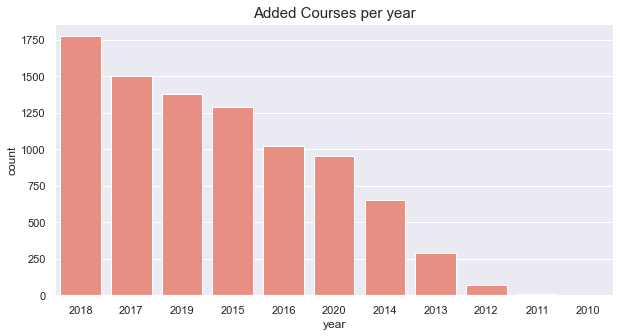

In [102]:
sb.set()
plt.figure(figsize=(10,5))
sb.countplot(x=df['year'],order=df.year.value_counts().sort_values(ascending=False).index,color='salmon');
plt.title("Added Courses per year",fontsize=15);

we can see that most number of courses added in the year of 2018

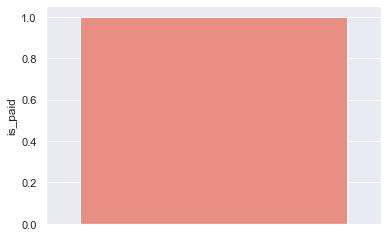

In [110]:
sb.barplot(y=df['is_paid'],color='salmon');

we can see that all are paid courses

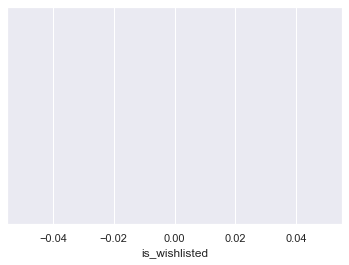

In [113]:
sb.barplot(df['is_wishlisted'],color='salmon');

Not a single course available in wishlist

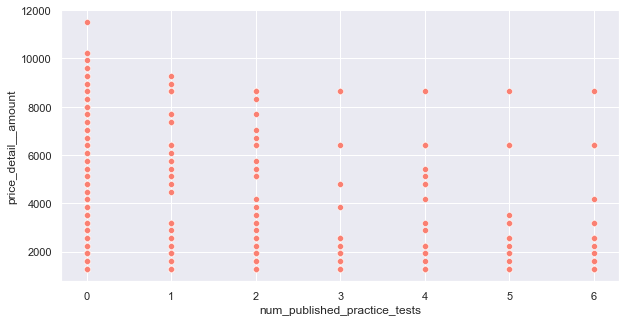

In [117]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=df['num_published_practice_tests'],y=df['price_detail__amount'],color='salmon');

practice test doesnt affect the price of course

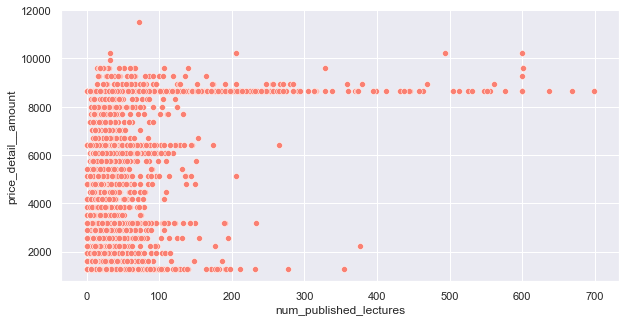

In [35]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=df['num_published_lectures'],y=df['price_detail__amount'],color='salmon');

both have very minor correlation b/w published lectures and course price

In [38]:
#converting python file into excel

df.to_excel("C:\\Users\\Laptop-PC\\Desktop\\Business Intelligence on Ed-Tech Data\\Ed_Tech1.xlsx",index=False)

In [ ]:
# this is tableau dashboard file link you can check from here or from tableau file

https://public.tableau.com/app/profile/pooja.pal8257/viz/Ed-Tech/Dashboard1?publish=yes